# Bayesian analysis in R


## Description of the data
The data [Empirical-Software-Engineering](W. Afzal, A. N. Ghazi, J. Itkonen,
R. Torkar, A. Andrews, and K. Bhatti.
An experiment on the effectiveness
and efficiency of exploratory testing.
Empirical Software Engineering, 20(3):
844–878, 2015. ISSN 1573-7616. doi:
10.1007/s10664-014-9301-4 "Empirical Software Engineering") is from an experiment where 70 subjects participated. Of the 70, 46 subjects were categorized as less experienced (LE) and 24 were categorized as more experienced (ME). The experiment evaluated two software testing techniques, i.e., a new technique (NT) and an old technique (OT), used a small, noncritical system as the software under test, and had a 2 × 2 design to avoid learning bias. The effectiveness of each technique was measured through true positives (tp).

In [3]:
library(rethinking)
d <- read.csv("https://raw.githubusercontent.com/torkar/dat321/master/data_autumn2020.csv", sep=";") # nolint
head(d)

,subject,category,technique,tp
,<int>,<chr>,<chr>,<int>
1,1,LE,NT,5
2,1,LE,OT,6
3,2,LE,NT,3
4,2,LE,OT,3
5,3,LE,NT,7
6,3,LE,OT,3


## Descriptive statistics
First, I check the tp column I checked min, max, plot, density I saw
that everything was normal then I checked the category, I checked 2 Descriptive statistics
freq with library "summarytools" and I saw that everything fine then
I checked the last column and I saw weird things "0T" so that is an
error and I replace the "0T" to "OT".then I checked that every subject
has two rows in our data with "count" Function. the variables we’ll
need: in this assignment, I check Three likelihood one of them count
base and the others real number base, so I have two data lists that
one of I’ve standardized the outcome and in both data lists, tech
is 1 for new technique and 2 for old technique and cat is 1 for less
experience and 2 for more experience. 

,subject,category,technique,tp
,<int>,<chr>,<chr>,<int>
1,1,LE,NT,5
2,1,LE,OT,6
3,2,LE,NT,3
4,2,LE,OT,3
5,3,LE,NT,7
6,3,LE,OT,3


'data.frame':	140 obs. of  4 variables:
 $ subject  : int  1 1 2 2 3 3 4 4 5 5 ...
 $ category : chr  "LE" "LE" "LE" "LE" ...
 $ technique: chr  "NT" "OT" "NT" "OT" ...
 $ tp       : int  5 6 3 3 7 3 6 4 11 5 ...


[1] 1

[1] 11

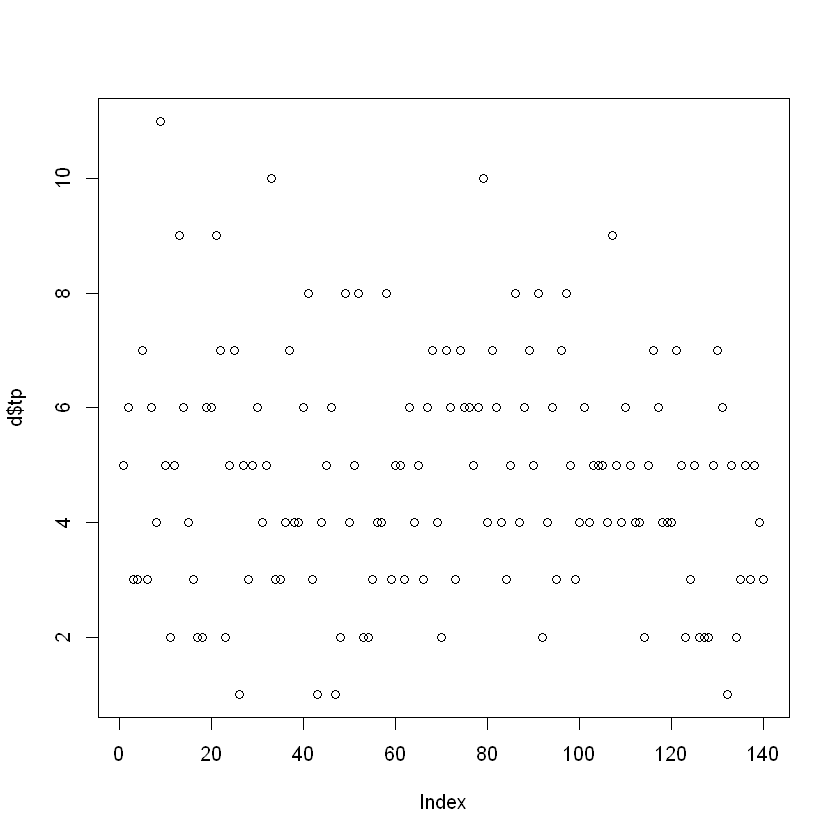

,Freq,% Valid,% Valid Cum.,% Total,% Total Cum.
LE,92,65.71429,65.71429,65.71429,65.71429
ME,48,34.28571,100.00000,34.28571,100.00000
<NA>,0,NA,NA,0.00000,100.00000
Total,140,100.00000,100.00000,100.00000,100.00000


[1] "0T"

,Freq,% Valid,% Valid Cum.,% Total,% Total Cum.
0T,1,0.7142857,0.7142857,0.7142857,0.7142857
NT,70,50.0000000,50.7142857,50.0000000,50.7142857
OT,69,49.2857143,100.0000000,49.2857143,100.0000000
<NA>,0,NA,NA,0.0000000,100.0000000
Total,140,100.0000000,100.0000000,100.0000000,100.0000000


subject,freq
<int>,<int>
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2


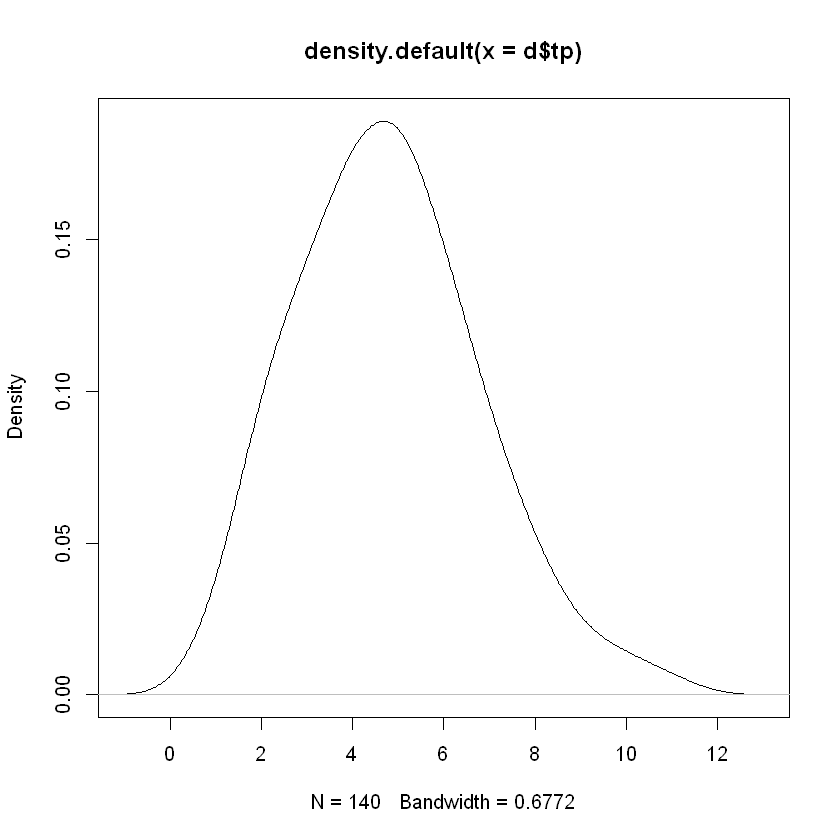

In [4]:
#_____________Descriptive statistics_________
head(d)
str(d)

#First check tp
min(d$tp)
max(d$tp)
plot(d$tp)
plot(density(d$tp))

#Second Check category
library(summarytools)
freq(d$category)

#third check technique
#______________Find Something________________
min(d$technique) #  "0T" !!
library(summarytools)
freq(d$technique) #find three categury !!

library(plyr)
count(d, "subject")


In [5]:
d$technique[d$technique == "0T"] <- "OT" #Fix the error

dat_list <- list(
    tp = standardize(d$tp),
    T = ifelse(d$technique == "NT", 1L, 2L),
    C = ifelse(d$category == "LE", 1L, 2L)
)

dat_list2 <- list(
    tp = d$tp,
    T = ifelse(d$technique == "NT", 1L, 2L),
    C = ifelse(d$category == "LE", 1L, 2L)
)


## Models
### likelihood(s)
I have two options for choosing likelihood one of them going base real number the other one going base count number and I want to compare these two models and show that "Is it good to standardize and convert discrete numbers to  Real numbers or not?" so for count base number I have Two options one of them is binomial and the other one is Poisson and because we have a low rate for Score so I choose Poisson and in Poisson I have two other options one of them Standard Poisson and the other one Gama Poisson at first I check mean and variance of tp 4 and I saw that there is a little difference so There should not be much difference between the two likelihoods So I choose Poisson for Three reasons:
1. Count Events With Low rate 
2. Mean and Variance are almost equal 
3. we don’t have many trials so adding parameters Probably not a good idea

Eventually, I became curious to check Gama-Poisson too.

### Priors
To define prior I need to find mean, min, max of data for both desecrate number data and real number data so at first, I calculate them. I have 6 models:

In [7]:
mean(dat_list$tp)
min(dat_list$tp)
max(dat_list$tp)
mean(dat_list2$tp)
min(dat_list2$tp)
max(dat_list2$tp)


[1] 6.141386e-17

[1] -1.868999

[1] 3.077312

[1] 4.778571

[1] 1

[1] 11

### M1:
at first, I check the data that see that we can have negative and
positive so at first, I put zero for normal model a and the same
for bT and bC but for variance, I check some numbers to get the
best result for the first I check 1 but I know that the mean so near
to zero so this number should be near to zero but I just want to
check and get experience and for both bT and bC I know that this
is slope and C and T they can just take two number of 1,2 because
of mean the bT and bC obviously that must be less than 1 then I
create my model I check n_eff and Rhat, the Rhat shows 1 so I’m
in a good way but But the situation of n_eff is not very good its
less than the 1000 and so far to 2000 for 4 chains. I tried different
numbers and finally, I got to this model (you can see my tries and
precis of each number)

In [8]:
m1 <- ulam(
  alist(
    tp ~ dnorm(mu, sigma),
    mu <- a + bT * T + bC * C,
    a ~ dnorm(0, 0.2),
    c(bT, bC) ~ dnorm(0, 0.5),
    sigma ~ dexp(1)
  ), data = dat_list, chains = 4, cores = 4, log_lik = TRUE
)

Warning message in socketConnection("localhost", port = port, server = TRUE, blocking = TRUE, :
"port 11724 cannot be opened"


ERROR: Error in socketConnection("localhost", port = port, server = TRUE, blocking = TRUE, : cannot open the connection


### M2:
m2 is the same as m1 Being as the likelihood is the same but it is an iteration model

In [ ]:
m2 <- ulam(
  alist(
    tp ~ dnorm(mu, sigma),
    mu <- bt[T] + bc[C],
    bt[T] ~ dnorm(0, 0.05),
    bc[C] ~ dnorm(0, 0.05),
    sigma ~ dexp(1)
  ), data = dat_list, chains = 4, cores = 4, log_lik = TRUE)



### M3:
I use Poisson so first I check to mean, min, max and then calculate the log of them and because of Poisson use discrete outcome so I use dat_list$tp so the result is 1.5 as mean, 0 as min and 2.4 as max so for log(lambda) I set 1.5 as a centre and 1.5 as variance too so now it is cover all number


In [ ]:
m3 <- ulam(
  alist(
    tp ~ dpois(lambda),
    log(lambda) <- a,
    a ~ dnorm(1.5, 1.5)
  ), data = dat_list2, chains = 4,iter = 2000, log_lik = TRUE
)


### M4:
I just add more parameters and the prior for alpha is the same and for bt and bc, I know that T and C can get 1 and 2 and we need to negative them Considering that sometimes alpha maybe more and we need to Decrease it so I centre it with 0 but it should be less than 1 so we need a number less than .5 (because of 2) so I put 0.2(actually I test .5 and .4) but I get better result of 0.2

In [ ]:
m4 <- ulam(
  alist(
    tp ~ dpois(lambda),
    log(lambda) <- a + bt[T]+bc[C],
    a ~ dnorm(1.5, 1.5),
    bt[T] ~ dnorm( 0 , 0.2 ),
    bc[C] ~ dnorm( 0 , 0.2 )
    

  ), data = dat_list2, chains = 4,iter = 2000, log_lik = TRUE
)

### M6:
I use Gama-Poisson in this model, all priors are the same as Poisson(M3) Thanks to the link function is the same and I use the same parameters.


In [ ]:
m6 <- ulam(
  alist(
    tp ~ dgampois( lambda , phi ),
    log(lambda) <- a + bt[T]+bc[C],
    a ~ dnorm(1.5,.5),
    bt[T] ~ dnorm( 0 , 0.2 ),
    bc[C] ~ dnorm( 0 , 0.2 ),
    phi ~ dexp(1)
  ), data=dat_list2 ,cores=4, chains=4,cmdstan = TRUE ,iter = 2000 , log_lik=TRUE )



### M5,M7,M8:
these models created by just experience or technique to see that how much these variables effect, I explain that in further


for all models i check prior and posterior predictive check and check
Max and min values(plot is located at prior predictive check).

m5 <- ulam(
  alist(
    tp ~ dnorm(mu, sigma),
    mu <- bt[T]  ,
    bt[T] ~ dnorm(0, 0.05),
    sigma ~ dexp(1)
  ), data = dat_list, chains = 4, cores = 4, log_lik = TRUE)


In [ ]:
m7 <- ulam(
  alist(
    T ~ dgampois( lambda , phi ),
    log(lambda) <- a + bt[T],
    a ~ dnorm(1.5, .5),
    bt[T] ~ dnorm( 0 , 0.2 ),
    phi ~ dexp(1)
  ), data=dat_list2 ,cores=4, chains=4,iter = 2000,
  cmdstan = TRUE , log_lik=TRUE )

In [ ]:
m8 <- ulam(
  alist(
    T ~ dgampois( lambda , phi ),
    log(lambda) <- a + bc[C],
    a ~ dnorm(1.5, .5),
    bc[C] ~ dnorm( 0 , 0.2 ),
    phi ~ dexp(1)
  ), data=dat_list2 ,cores=4, chains=4,iter = 2000,
  cmdstan = TRUE , log_lik=TRUE )

## Compare
I write the compare code with 4models and the result shows that
the m2(interaction Normal model) is better than m1(Normal model)
and m1 is better than m4(interaction Poisson model) and m4 is better than m3(Standard Poisson model) (because in WAIC The lower
WAIC is the better Model ) I checked to compare with the LOO
function but I didn’t see anything change and everything is the
same approximately.

In [ ]:
compare(m1, m2,m3,m4, func = WAIC)

compare(m1, m2,m3,m4, func = LOO)